In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
YEAR = 2021

In [3]:
df = pd.read_csv(f'../dataset/summary_{YEAR}.csv', encoding='utf-8-sig')

def read_file(year):
    PATH = f'../dataset/imbank_customer_data/iMBANK_CUSTOMER_DATA_{year}(K-DigitalTraining).csv'
    df = pd.read_csv(PATH, encoding='euc-kr', usecols=['기준년월', '고객ID', '성별', '고객등급', '자택_시도', '수신_요구불예금', '수신_거치식예금', '수신_적립식예금', '대출금액'])
    df = df.sort_values(by='기준년월', ascending=True).reset_index(drop=True)
    return df

M_CS = read_file(YEAR)

# 고객 id 
filtered_data = df[df['연령대'].isin(['20대', '30대'])]['고객ID'].unique()

# 20, 30대의 고객 ID만 뽑음
M_filtered_data = M_CS[M_CS['고객ID'].isin(filtered_data)]

# 수신잔고, sum(요구불 ~ 적립식)
M_filtered_data['수신잔고'] = M_filtered_data.groupby(['기준년월','고객ID'])[['수신_요구불예금', '수신_거치식예금', '수신_적립식예금']].transform('sum').sum(axis=1)

# 지역구분 대구, 경상북도 => 1, 나머지 => 0
M_filtered_data['지역구분'] = np.where(M_filtered_data['자택_시도'].isin(['대구광역시', '경상북도']), 1, 0)                                                                

# 수신대비대출비율
M_filtered_data['수신대비대출비율'] = np.where(M_filtered_data['수신잔고'] != 0, M_filtered_data['대출금액'] / M_filtered_data['수신잔고'], 0)

result = M_filtered_data.merge(df[['고객ID', '연령대', '이탈여부']], on='고객ID', how='left')
result

C:\Users\campus3S005\AppData\Local\Temp\ipykernel_11512\232365773.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_filtered_data['수신잔고'] = M_filtered_data.groupby(['기준년월','고객ID'])[['수신_요구불예금', '수신_거치식예금', '수신_적립식예금']].transform('sum').sum(axis=1)
C:\Users\campus3S005\AppData\Local\Temp\ipykernel_11512\232365773.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_filtered_data['지역구분'] = np.where(M_filtered_data['자택_시도'].isin(['대구광역시', '경상북도']), 1, 0)
C:\Users\campus3S005\AppData\Local\Temp\ipykernel

,기준년월,고객ID,성별,고객등급,자택_시도,수신_요구불예금,수신_거치식예금,수신_적립식예금,대출금액,수신잔고,지역구분,수신대비대출비율,연령대,이탈여부
0,202101,3032273566,남,일반등급,서울특별시,0,0,0,0,0,0,0.000000,30대,유지
1,202101,3032766944,남,일반등급,대전광역시,100000,0,0,100000,100000,0,1.000000,20대,이탈
2,202101,3032863476,남,일반등급,경기도,0,0,0,0,0,0,0.000000,30대,유지
3,202101,3032782859,남,일반등급,서울특별시,0,0,0,0,0,0,0.000000,30대,이탈
4,202101,3032966180,여,일반등급,대구광역시,0,0,0,0,0,1,0.000000,20대,유지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755252,202112,9996689486,여,일반등급,대구광역시,5800000,0,0,0,5800000,1,0.000000,30대,유지
2755253,202112,9996720726,남,일반등급,대구광역시,1200000,0,0,0,1200000,1,0.000000,30대,이탈
2755254,202112,9996732244,남,일반등급,경상북도,7200000,0,0,0,7200000,1,0.000000,30대,유지
2755255,202112,9996756045,남,일반등급,경상북도,300000,0,0,0,300000,1,0.000000,30대,유지


In [4]:
result = M_filtered_data.merge(df[['고객ID', '연령대', '이탈여부']], on='고객ID', how='left')

In [5]:
result.to_csv(f'../dataset/imbank_customer_data/customer_newCols_{YEAR}.csv', encoding='euc-kr')

In [6]:
def read_file1(year):
    PATH = f'../dataset/imbank_card_data/iMBANK_CARD_DATA_{year}(K-DigitalTraining).csv'
    df = pd.read_csv(PATH, encoding='euc-kr', usecols=['거래년월','고객ID','승인건수','승인금액'])
    df = df.sort_values(by='거래년월', ascending=True).reset_index(drop=True)
    # 승인건수를 숫자로 변환 (필요한 경우 오류 처리)
    
    # 승인건수를 범주화
    df.loc[df['승인건수'] == '5번이하', '승인건수'] = 1
    df.loc[df['승인건수'] == '5번초과 10번이하', '승인건수'] = 2
    df.loc[df['승인건수'] == '10번초과 15번이하', '승인건수'] = 3
    df.loc[df['승인건수'] == '15번초과 20번이하', '승인건수'] = 4
    df.loc[df['승인건수'] == '20번 초과', '승인건수'] = 5
     
    # 새 변수 생성
    df['월별승인금액합계'] = df.groupby(['거래년월','고객ID'])['승인금액'].transform('sum')
    df['월별승인건수평균'] = df.groupby(['거래년월','고객ID'])['승인건수'].transform('sum') / df.groupby(['거래년월','고객ID'])['승인건수'].transform('count')

    df = df.drop_duplicates(['거래년월', '고객ID'], keep='last')
    df.drop('승인금액', axis=1, inplace=True)    
    return df
       
C = read_file1(YEAR) 

# 이전 고객ID, 연령, 이탈여부 summary파일 불러오기
dist = pd.read_csv(f'../dataset/summary_{YEAR}.csv')
dist.head(3)

# inner join(card2022 <- summary 파일)
cs_merge = C.merge(dist, on = '고객ID', how = 'inner')

In [7]:
cs_merge.drop(['승인건수', '마지막 거래년월','거래이후소요기간'], axis=1, inplace=True)

In [8]:
cs_merge

,거래년월,고객ID,월별승인금액합계,월별승인건수평균,이탈여부,연령대
0,202101,5220442100,20000,1.0,유지,20대
1,202101,9964948252,90000,1.0,유지,60대이상
2,202101,8060966482,40000,1.0,유지,40대
3,202101,3758265909,10000,1.0,유지,20대
4,202101,7188521409,50000,1.0,유지,40대
...,...,...,...,...,...,...
6468227,202112,6644991680,1570000,1.055556,유지,40대
6468228,202112,5790065299,480000,1.0,유지,60대이상
6468229,202112,4080934272,160000,1.0,유지,20대
6468230,202112,3914344194,280000,1.0,유지,20대


In [9]:
cs_merge.to_csv(f'../dataset/imbank_card_data/card_newCols_{YEAR}.csv', encoding='euc-kr')

In [10]:
# TARGET = '월별승인건수평균'
TARGET = '월별승인금액합계'

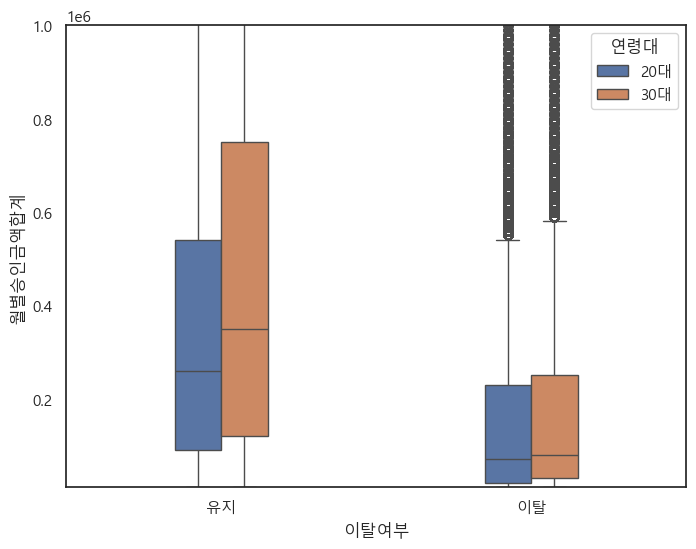

In [11]:
# 간단한 box plot 그리기
# 시각화 그리기 한글폰트 가가
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

fig, ax = plt.subplots(figsize = (8, 6))
filtered_data = cs_merge[cs_merge['연령대'].isin(['20대', '30대'])]
sns.boxplot(filtered_data, x = '이탈여부', y = TARGET, width=0.3, hue='연령대')
plt.ylim(10000, 1000000)
plt.show()

In [12]:
# 이상치 비율 확인
# 1분위
q1_i = cs_merge[cs_merge['이탈여부']=='이탈'][TARGET].quantile(q=0.25)
# 3분위
q3_i = cs_merge[cs_merge['이탈여부']=='이탈'][TARGET].quantile(q=0.75)

IQR =  q3_i - q1_i 


In [13]:
q1 = cs_merge[cs_merge['이탈여부']=='유지'][TARGET].quantile(q=0.25)
q3 = cs_merge[cs_merge['이탈여부']=='유지'][TARGET].quantile(q=0.75)

In [14]:
q3

np.float64(630000.0)

In [15]:
df_iqr = cs_merge[cs_merge[TARGET]>= (q3[TARGET] + 1.5*IQR[TARGET])]
df_iqr = pd.concat([cs_merge[cs_merge[TARGET] <= (q1[TARGET] - 1.5*IQR[TARGET])], df_iqr])

IndexError: invalid index to scalar variable.

In [ ]:
q3

월별승인금액합계    710000.0
Name: 0.75, dtype: float64

In [ ]:
df_iqr

,거래년월,고객ID,월별승인금액합계,월별승인건수평균,이탈여부,연령대
1043,202301,3618507390,4200000,1.0,이탈,20대
1143,202301,7490743063,2600000,1.0,유지,50대
2306,202301,6303839751,5500000,1.0,이탈,60대이상
2633,202301,4058149531,2000000,1.0,유지,30대
2844,202301,6697164805,4200000,1.0,유지,30대
...,...,...,...,...,...,...
6383019,202312,7864478616,4420000,1.0,유지,40대
6383022,202312,7180433084,1770000,1.0,유지,50대
6383025,202312,4406597530,2600000,1.037037,유지,30대
6383026,202312,5996611034,2090000,1.096774,유지,50대


In [ ]:
outlier_ratio=df_iqr[TARGET].count() / cs_merge[TARGET].count()
outlier_ratio

np.float64(0.06890723231643399)